# 1. Data Understanding

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
#looking for duplicated data. Here, there are 0 duplicated data.
df.duplicated().sum()

0

# 2. Data Cleaning

In [9]:
#Change date types for datetime
df['datetime'] = pd.to_datetime(df['datetime'],
                                format='%Y-%m-%d %H:%M:%S')

In [10]:
#Adding variable of Hour, Days, Month, and Year
df['Hour'] = pd.DatetimeIndex(df['datetime']).hour
df['Day'] = pd.DatetimeIndex(df['datetime']).weekday
df['Month'] =pd.DatetimeIndex(df['datetime']).month
df['Year'] =pd.DatetimeIndex(df['datetime']).year

In [11]:
#Make sure that the range of time is right
min(df['datetime']),max(df['datetime'])

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

<AxesSubplot:xlabel='temp'>

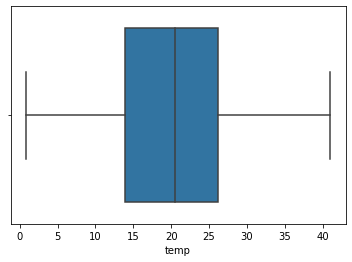

In [12]:
#Check outlier
sns.boxplot(x=df["temp"])

<AxesSubplot:xlabel='atemp'>

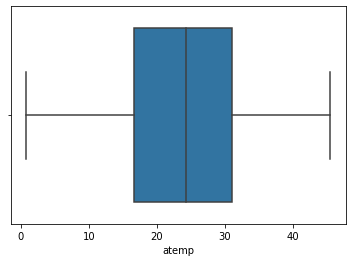

In [13]:
sns.boxplot(x=df["atemp"])

<AxesSubplot:xlabel='humidity'>

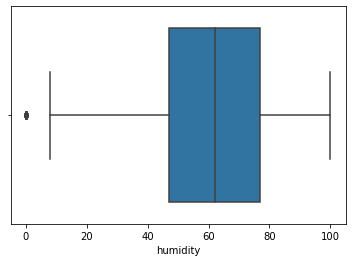

In [14]:
sns.boxplot(x=df["humidity"])

In [15]:
def IQR(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile (x, 75)
    IQR = q3 - q1
    lower_limit= q1-(1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    return lower_limit, upper_limit

In [16]:
x, y = IQR(df['humidity'])
df = df[(df['humidity']>x) & (df['humidity']<y)]

<AxesSubplot:xlabel='windspeed'>

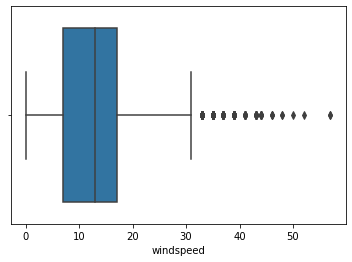

In [17]:
sns.boxplot(x=df["windspeed"])

In [18]:
x, y = IQR(df['windspeed'])
df = df[(df['windspeed']>x) & (df['windspeed']<y)]

<AxesSubplot:xlabel='casual'>

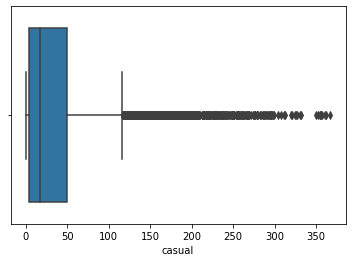

In [19]:
sns.boxplot(x=df["casual"])

In [20]:
x, y = IQR(df['casual'])
df = df[(df['casual']>x) & (df['casual']<y)]

<AxesSubplot:xlabel='registered'>

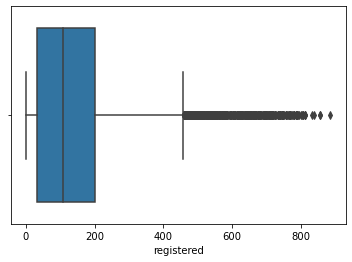

In [21]:
sns.boxplot(x=df["registered"])

In [22]:
x, y = IQR(df['registered'])
df = df[(df['registered']>x) & (df['registered']<y)]

<AxesSubplot:xlabel='registered'>

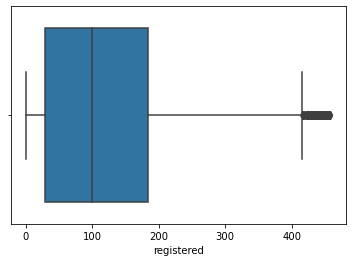

In [23]:
sns.boxplot(x=df["registered"])

# 3.Exploratory Data Analysis

In [24]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Day,Month,Year
count,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000
mean,2.497815,0.026751,0.709581,1.435149,19.518674,22.912579,63.834275,12.108608,23.591815,121.125973,144.717787,11.097943,2.933497,6.493232,2011.475647
std,1.136669,0.161362,0.453980,0.640950,7.672882,8.352390,18.682915,7.443742,26.763817,106.800030,124.423204,7.175177,1.978420,3.527782,0.499433
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2011.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,49.000000,7.001500,3.000000,28.000000,33.000000,5.000000,1.000000,3.000000,2011.000000
50%,2.000000,0.000000,1.000000,1.000000,18.860000,22.725000,65.000000,11.001400,12.000000,99.000000,119.000000,11.000000,3.000000,6.000000,2011.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,16.997900,36.000000,183.000000,226.000000,18.000000,5.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,31.000900,116.000000,458.000000,563.000000,23.000000,6.000000,12.000000,2012.000000


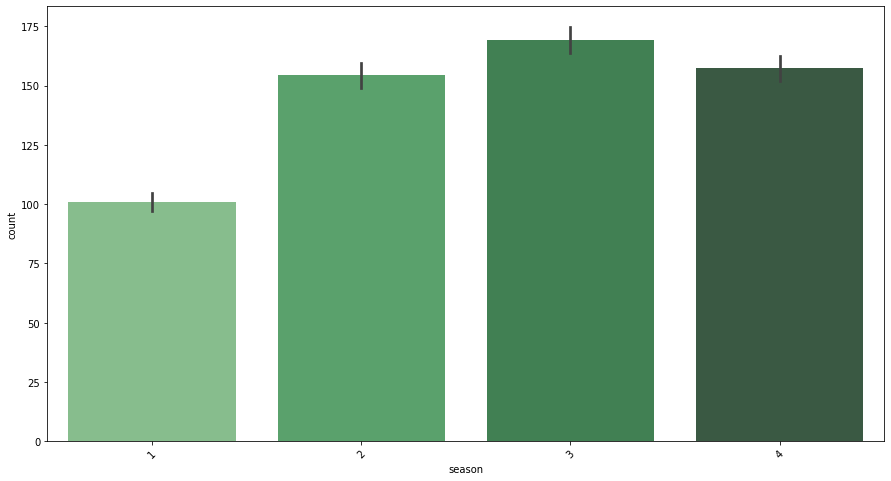

In [25]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
ax = sns.barplot(x=df['season'], y='count', data=df, palette="Greens_d")

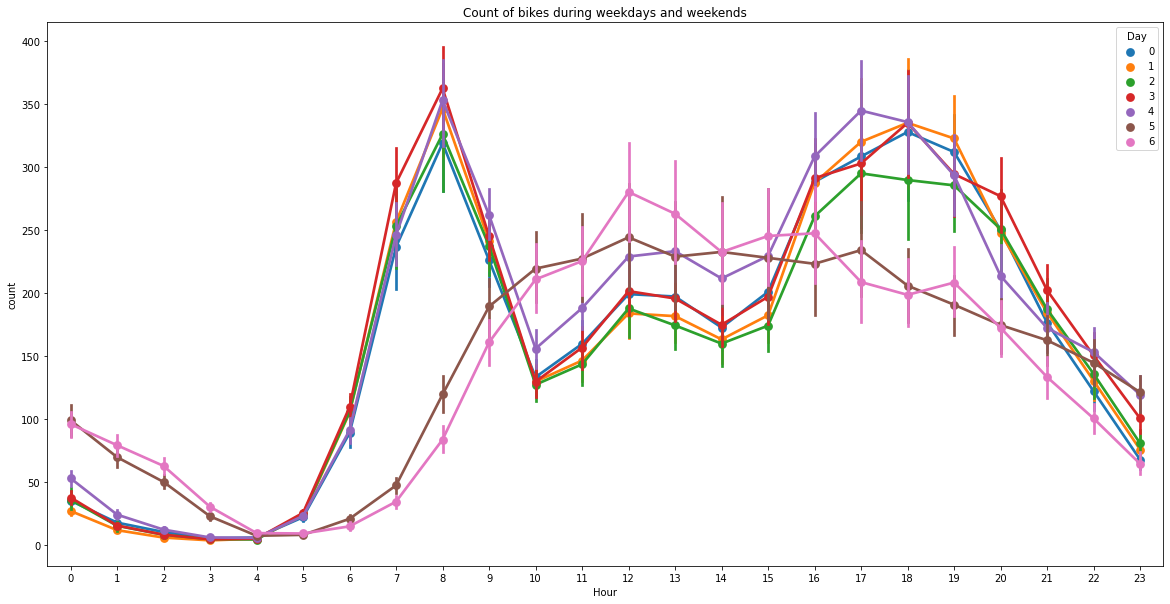

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Hour', y='count', hue='Day' , ax=ax)
ax.set(title='Count of bikes during weekdays and weekends');

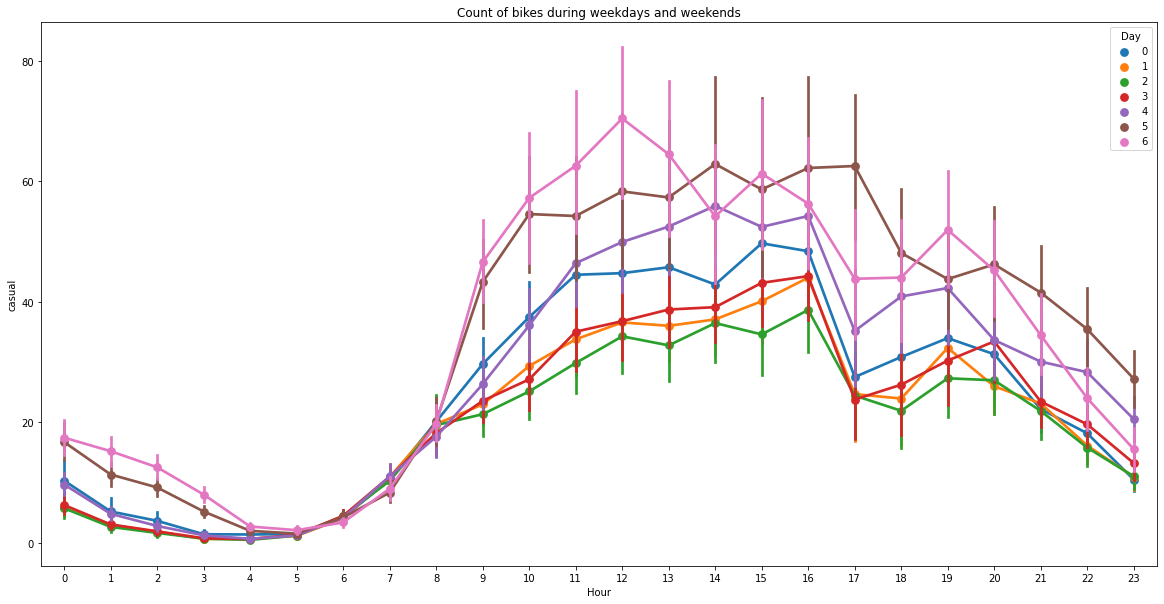

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Hour', y='casual', hue='Day' , ax=ax)
ax.set(title='Count of Casual bikes  during weekdays and weekends');

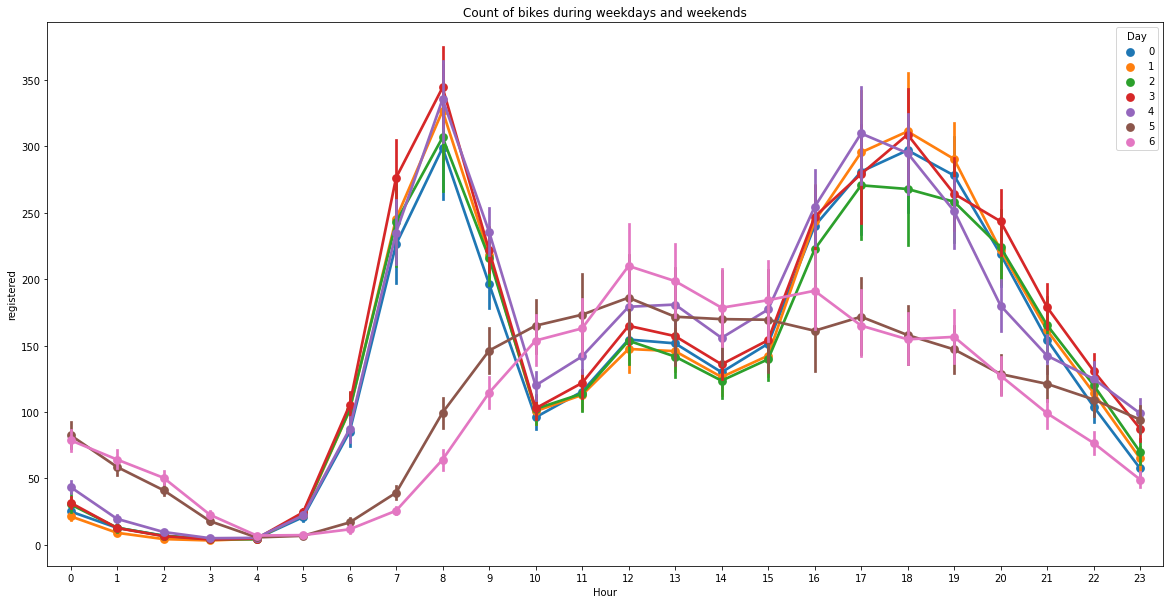

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Hour', y='registered', hue='Day' , ax=ax)
ax.set(title='Count of Registered bikes during weekdays and weekends');

[Text(0.5, 1.0, 'Count of bikes during different months')]

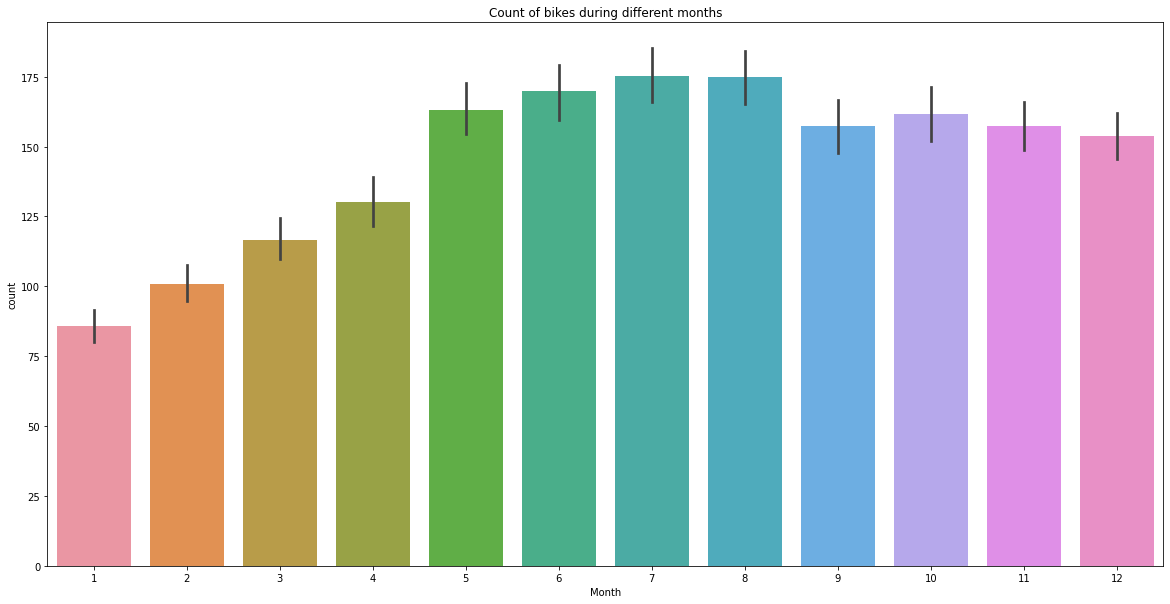

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='Month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different season')]

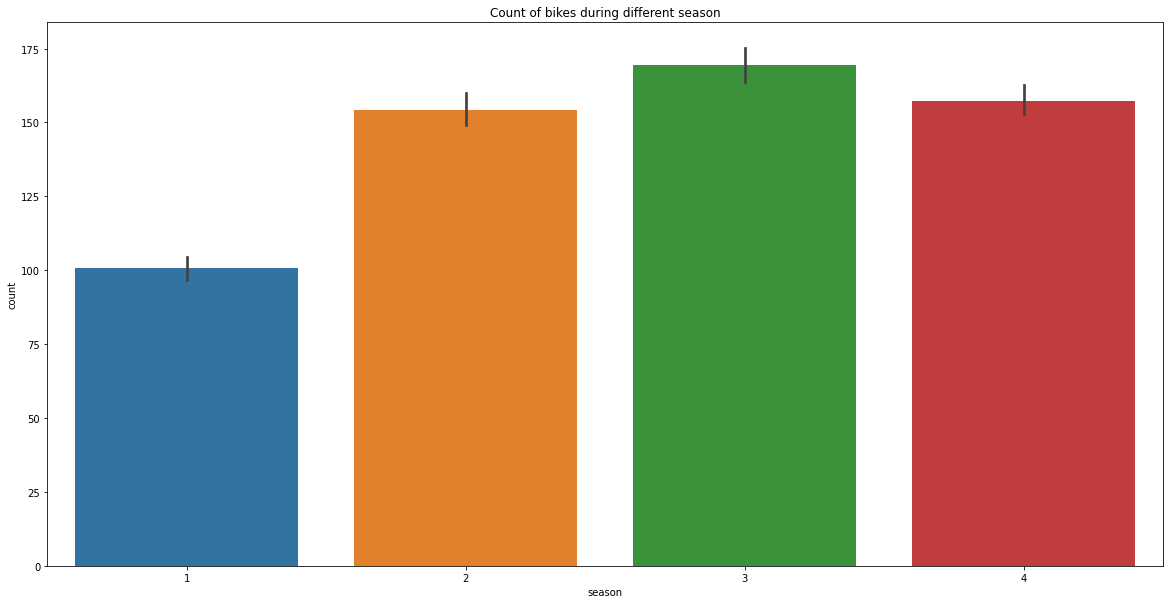

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='season', y='count', ax=ax)
ax.set(title='Count of bikes during different season')

C:\Users\asus\AppData\Local\Temp/ipykernel_7964/3982555104.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


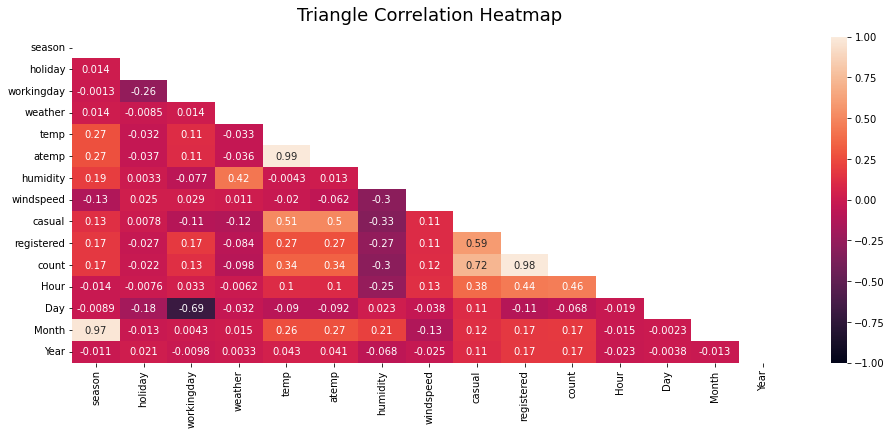

In [47]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);